# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [106]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
df['gender'].replace(
    to_replace = ['M', 'F'],
    value=[0,1],
    inplace=True
)
df.tail()

,temperature,gender,heart_rate
125,96.3,0,70.0
126,97.7,0,77.0
127,98.2,1,73.0
128,97.9,0,72.0
129,98.7,1,59.0


In [12]:
import scipy.stats
temps = df['temperature'].values.tolist()
scipy.stats.mstats.normaltest(temps)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

## Question 1

From the data given the p value is much greater than the 5% threshold, thus the null hypothesis cannot be rejected and there is not enough evidence to demonstrate that the distribution of body temperatures in the total population does not follow a normal distribution. There we can assume that the sample follows a normal distribution.

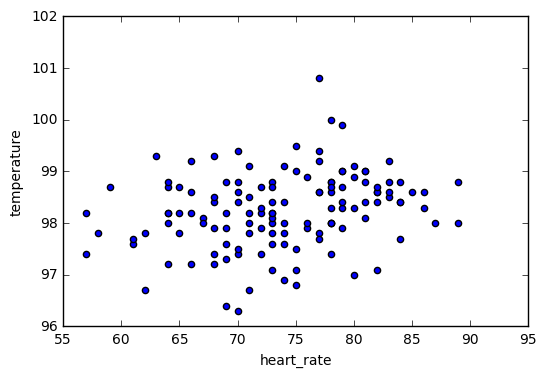

In [115]:
%matplotlib inline
df.plot(x='heart_rate', y='temperature', kind='scatter')

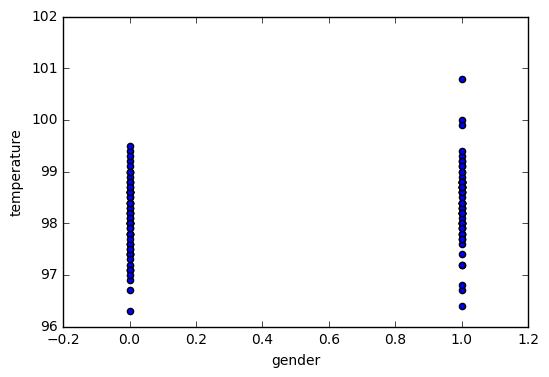

In [116]:
df.plot(x='gender', y='temperature', kind='scatter')

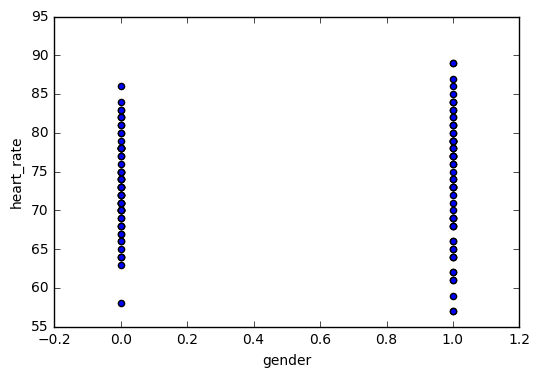

In [118]:
df.plot(x='gender', y='heart_rate', kind='scatter')

In [119]:
scipy.stats.chisquare(temps)

Power_divergenceResult(statistic=0.70580626976918936, pvalue=1.0)

In [120]:
scipy.stats.chisquare(df)

Power_divergenceResult(statistic=array([  0.70580627,  65.        ,  87.22171238]), pvalue=array([ 1.        ,  0.99999952,  0.99818125]))

## Question 2

A sample size of 130 is large enough and the samples are independent.

In [144]:
import numpy as np

mean_temp = np.mean(temps)
std_err = scipy.stats.sem(temps)
tscore = scipy.stats.t.ppf(1-0.025, 129)

print ('the mean temperature is: ', mean_temp)
print ('the standard err of the sample is: ', std_err)
print ('the two tail 95% confidence t-score distribution of the sample is: ', tscore)


the mean temperature is:  98.2492307692
the standard err of the sample is:  0.0643044168379
the two tail 95% confidence t-score distribution of the sample is:  1.97852449146


In [143]:
upper_confidence_limit = mean_temp + tscore*std_err
lower_confidence_limit = mean_temp - tscore*std_err

print('We can be 95% sure that the real population mean body temperature is between', lower_confidence_limit, 'and', upper_confidence_limit)

We can be 95% sure that the real population mean body temperature is between 98.0667745921 and 98.4316869464


In [95]:
female_df = df.loc[df['gender'] == 1]
female_temps = female_df['temperature'].values.tolist()
male_df = df.loc[df['gender'] == 1]
male_temps = df['temperature'].values.tolist()

In [122]:
female_mean_temp = np.mean(female_temps)
female_std_err = scipy.stats.sem(female_temps)
female_tscore = scipy.stats.t.ppf(1-0.025, 129)

print ('the mean temperature is: ', female_mean_temp)
print ('the standard err of the sample is: ', female_std_err)
print ('the two tail 95% confidence t-score distribution of the sample is: ', female_tscore)

female_upper_confidence_limit = female_mean_temp + female_tscore*female_std_err
female_lower_confidence_limit = female_mean_temp - female_tscore*female_std_err

print('We can be 99% sure that the real female population mean body temperature is between', female_lower_confidence_limit, 'and', female_upper_confidence_limit)

the mean temperature is:  98.3938461538
the standard err of the sample is:  0.0922183060804
the two tail 95% confidence t-score distribution of the sample is:  1.97852449146
We can be 99% sure that the real population mean body temperature is between 98.2113899767 and 98.576302331


In [141]:
male_mean_temp = np.mean(male_temps)
male_std_err = scipy.stats.sem(male_temps)
male_tscore = scipy.stats.t.ppf(1-0.025, 129)

print ('the mean temperature is: ', male_mean_temp)
print ('the standard err of the sample is: ', male_std_err)
print ('the two tail 95% confidence t-score distribution of the sample is: ', male_tscore)

male_upper_confidence_limit_z = mean_temp + zscore*std_err_z
male_lower_confidence_limit_z = mean_temp - zscore*std_err_z

print('We can be 95% sure that the real male population mean body temperature is between', male_lower_confidence_limit, 'and', male_upper_confidence_limit)


the mean temperature is:  98.2492307692
the standard err of the sample is:  0.0643044168379
the two tail 95% confidence t-score distribution of the sample is:  1.97852449146
We can be 95% sure that the real population mean body temperature is between 98.1220029056 and 98.3764586329


In [146]:
# it was deemed appropriate to use the t score because we do not know the population standard deviation.
# although the population sample was greater than 30 which means the z score could also be used
# for demonstration purposes calculating the total population mean using the z score 
std_err_z = scipy.stats.sem(female_temps)
mean_temp_z = np.mean(temps)
zscore = scipy.stats.norm.ppf(.975)

print ('the mean temperature is: ', mean_temp_z)
print ('the standard deviation of the sample is: ', std_dev)
print ('the two tail 95% confidence z-score distribution of the sample is: ', zscore)

upper_confidence_limit_z = mean_temp_z + zscore*male_std_err
lower_confidence_limit_z = mean_temp_z - zscore*male_std_err

print('We can be 95% sure that the real population mean body temperature is between', lower_confidence_limit_z, 'and', upper_confidence_limit_z)


the mean temperature is:  98.2492307692
the standard deviation of the sample is:  0.730357778905
the two tail 95% confidence z-score distribution of the sample is:  1.95996398454
We can be 95% sure that the real population mean body temperature is between 98.1231964282 and 98.3752651103


## Question 3

The 95% confidence interval for the population mean of body temperature is between 98.12 degrees F and 98.37 degrees F. The likelihood of the true population mean being 98.6 degrees F can therefore be discounted, but the female true population mean could be within the limits of confidence as it is on the border of the 95% confidence interval. The z score resulted in an expected tighter confidence range, but the difference between the z and t statistic were ultimately not signifiant.

## Question 4

Female temperatures above 98.6 degrees F would be considered abnormal according to a 95% confidence interval. Male temperatures above 98.38 degrees F would be considered abnormal according to a 95% confidence interval.

In [153]:
scipy.stats.ttest_ind(male_temps, female_temps, equal_var=False)

Ttest_indResult(statistic=-1.2863330628904488, pvalue=0.20067562118325752)

## Question 5

From a t-statistic independence test of the male and female temperature readings the p-value is much greater than 5% and therefore we cannot reject the null hypothesis and there is no significant statistically difference between the male and female temperatures based upon this data.

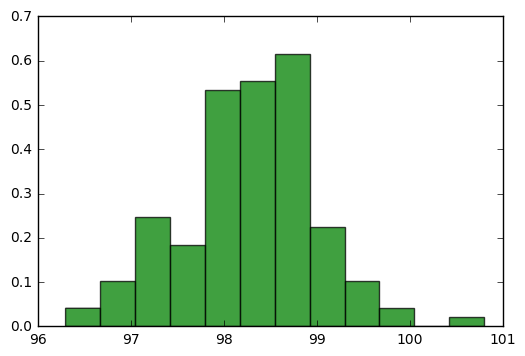

In [20]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(temps, 12, normed=1, facecolor='green', alpha=0.75)
plt.show()

## Conclusion

The data demonstrates that 98.6 degrees F is likely to be a statistically incorrect mean population temperature. 


2.3553745848044381